In [4]:
import collections
from vnpy.app.script_trader import init_cli_trading
from vnpy.app.script_trader.cli import process_log_event
from vnpy.gateway.ib import IbGateway
from time import sleep
from datetime import datetime
import pandas as pd
from vnpy.app.cta_strategy.backtesting import BacktestingEngine
from vnpy.app.cta_strategy.strategies.demo_strategy import DemoStrategy

In [10]:
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="MGC.NYMEX",
    interval="1m",
    start=datetime(2007, 12, 12),
    end=datetime(2020, 5, 1),
    rate=0.000028,
    slippage=0.1,
    size=10,
    pricetick=0.1,
    capital=20000,
    collection_name = "MGC"
)
engine.load_data()

2020-06-02 18:02:35.437623	开始加载历史数据
2020-06-02 18:02:35.437623	加载进度： [1%]
2020-06-02 18:02:35.437623	加载进度： [1%]
2020-06-02 18:02:35.437623	加载进度： [2%]
2020-06-02 18:02:35.437623	加载进度： [3%]
2020-06-02 18:02:35.437623	加载进度： [3%]
2020-06-02 18:02:35.437623	加载进度： [4%]
2020-06-02 18:02:35.437623	加载进度： [5%]
2020-06-02 18:02:35.437623	加载进度： [5%]
2020-06-02 18:02:35.437623	加载进度： [6%]
2020-06-02 18:02:35.437623	加载进度： [7%]
2020-06-02 18:02:35.437623	加载进度： [7%]
2020-06-02 18:02:35.437623	加载进度： [8%]
2020-06-02 18:02:35.437623	加载进度： [9%]
2020-06-02 18:02:35.438623	加载进度： [9%]
2020-06-02 18:02:35.438623	加载进度： [10%]
2020-06-02 18:02:35.438623	加载进度：# [11%]
2020-06-02 18:02:35.438623	加载进度：# [11%]
2020-06-02 18:02:35.438623	加载进度：# [12%]
2020-06-02 18:02:35.438623	加载进度：# [13%]
2020-06-02 18:02:35.438623	加载进度：# [13%]
2020-06-02 18:02:35.438623	加载进度：# [14%]
2020-06-02 18:02:35.438623	加载进度：# [15%]
2020-06-02 18:02:35.438623	加载进度：# [15%]
2020-06-02 18:02:35.438623	加载进度：# [16%]
2020-06-02 18:02:35.438623	加载进度：#

In [11]:
class_dict = collections.defaultdict(list)
for class_instance in engine.history_data:
    for key, value in class_instance.__dict__.items():
        class_dict[key].append(value)
frame = pd.DataFrame.from_dict(class_dict)

In [12]:
frame.head(5)

,gateway_name,symbol,exchange,datetime,interval,volume,open_interest,open_price,high_price,low_price,close_price,vt_symbol
0,DB,MGC,Exchange.NYMEX,2011-03-25 00:12:00,Interval.MINUTE,1.0,0.0,1434.5,1434.5,1434.5,1434.5,MGC.NYMEX
1,DB,MGC,Exchange.NYMEX,2011-03-25 01:29:00,Interval.MINUTE,2.0,0.0,1434.7,1434.7,1434.7,1434.7,MGC.NYMEX
2,DB,MGC,Exchange.NYMEX,2011-03-25 01:33:00,Interval.MINUTE,1.0,0.0,1434.5,1434.5,1434.5,1434.5,MGC.NYMEX
3,DB,MGC,Exchange.NYMEX,2011-03-25 02:28:00,Interval.MINUTE,1.0,0.0,1436.5,1436.5,1436.5,1436.5,MGC.NYMEX
4,DB,MGC,Exchange.NYMEX,2011-03-25 03:02:00,Interval.MINUTE,1.0,0.0,1436.2,1436.2,1436.2,1436.2,MGC.NYMEX


In [13]:
frame.tail(5)

,gateway_name,symbol,exchange,datetime,interval,volume,open_interest,open_price,high_price,low_price,close_price,vt_symbol
1189589,DB,MGC,Exchange.NYMEX,2020-01-31 12:33:00,Interval.MINUTE,2.0,0.0,1456.6586,1456.6586,1455.7385,1455.7385,MGC.NYMEX
1189590,DB,MGC,Exchange.NYMEX,2020-01-31 12:36:00,Interval.MINUTE,2.0,0.0,1457.7627,1457.7627,1457.7627,1457.7627,MGC.NYMEX
1189591,DB,MGC,Exchange.NYMEX,2020-01-31 15:22:00,Interval.MINUTE,5.0,0.0,1459.8789,1459.8789,1459.8789,1459.8789,MGC.NYMEX
1189592,DB,MGC,Exchange.NYMEX,2020-01-31 15:24:00,Interval.MINUTE,5.0,0.0,1460.2469,1460.2469,1460.2469,1460.2469,MGC.NYMEX
1189593,DB,MGC,Exchange.NYMEX,2020-01-31 15:59:00,Interval.MINUTE,1.0,0.0,1459.0508,1459.0508,1459.0508,1459.0508,MGC.NYMEX


In [15]:
engine.add_strategy(DemoStrategy, {"fast_window":10, "slow_window":20})

2020-06-02 18:05:31.863907	策略初始化完成
2020-06-02 18:05:31.863907	开始回放历史数据
2020-06-02 18:06:15.514222	历史数据回放结束
2020-06-02 18:06:15.514222	开始计算逐日盯市盈亏
2020-06-02 18:06:16.029613	逐日盯市盈亏计算完成
2020-06-02 18:06:16.030612	开始计算策略统计指标
2020-06-02 18:06:16.071575	------------------------------
2020-06-02 18:06:16.071575	首个交易日：	2011-04-06
2020-06-02 18:06:16.072564	最后交易日：	2020-01-31
2020-06-02 18:06:16.073564	总交易日：	2744
2020-06-02 18:06:16.073564	盈利交易日：	698
2020-06-02 18:06:16.073564	亏损交易日：	2046
2020-06-02 18:06:16.073564	起始资金：	20,000.00
2020-06-02 18:06:16.073564	结束资金：	-165,712.21
2020-06-02 18:06:16.073564	总收益率：	-928.56%
2020-06-02 18:06:16.073564	年化收益：	-81.22%
2020-06-02 18:06:16.073564	最大回撤: 	-185,799.56
2020-06-02 18:06:16.073564	百分比最大回撤: -930.36%
2020-06-02 18:06:16.074562	最长回撤天数: 	3220
2020-06-02 18:06:16.074562	总盈亏：	-185,712.21
2020-06-02 18:06:16.074562	总手续费：	49,615.27
2020-06-02 18:06:16.074562	总滑点：	136,023.00
2020-06-02 18:06:16.074562	总成交金额：	1,771,973,810.47
2020-06-02 18:06:16.074562	总成交笔数

c:\vnstudio\lib\site-packages\vnpy\app\cta_strategy\backtesting.py:399: RuntimeWarning: invalid value encountered in log
  df["return"] = np.log(df["balance"] / df["balance"].shift(1)).fillna(0)
c:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.

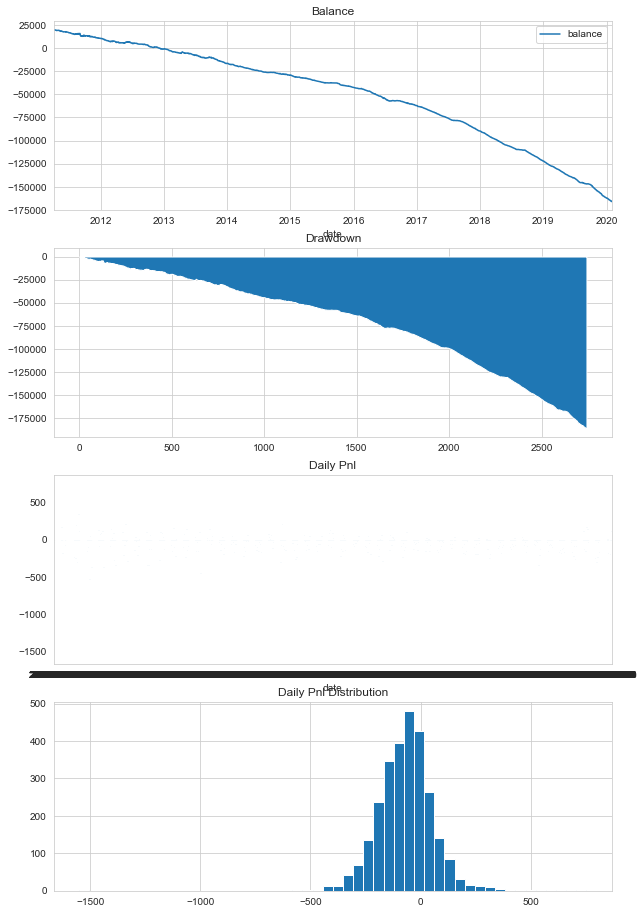

In [16]:
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()